In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

Bottlenecks - constant/irregular 
*ignoring bus stop sections
Finding downtown vs suburbs bottlenecks
1st Quartile of each route for constant
*Delayed data

Focus on Inbound/Outbound

Time categories -
## 6am - 9am AM Peak
9am-230pm Off Peak
230pm-6pm PM Peak
6pm-6am Overnight
Day of Interest
Saturday
Sunday
Holidays*
## M/F
## Tues-Thurs
## 5/25-7/26
## 1/25-5/24


In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

## data from 5/25/2022 - 7/24/2022 , AM peak, M/F

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

params_geo = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo1 = {
    'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params1 = {
       'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [5]:
response_geo = requests.get(URL, params = params_geo, headers = headers)
response_geo1 = requests.get(URL, params = params_geo1, headers = headers)
response = requests.get(URL, params = params, headers = headers)
response1 = requests.get(URL, params = params1, headers = headers)

In [6]:
response_line_seg = response_geo.json()['features']
response_line_seg1 = response_geo1.json()['features']
response_line_seg2 = response.json()['data']['segments']
response_line_seg3 = response.json()['data']['segments']
r3_525 = gpd.GeoDataFrame.from_features(response_line_seg)
r3_625 = gpd.GeoDataFrame.from_features(response_line_seg1)
r3_525j = pd.DataFrame.from_dict(response_line_seg2)
r3_625j = pd.DataFrame.from_dict(response_line_seg3)

In [7]:
r3_525

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.617277,15.028347,2.809,1.941,1.799,1.709,1.5810,1.474,1.355,1.144
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.369030,10.242589,8.009,3.766,2.783,2.401,2.0800,1.841,1.640,1.256
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.424825,17.044198,1.875,1.614,1.582,1.491,1.4320,1.322,1.224,1.083
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.221471,11.187632,7.207,3.511,2.813,2.245,1.8385,1.659,1.408,1.056
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.064083,2.710920,67.580,42.925,5.901,3.671,2.4060,1.757,1.398,0.932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.571910,15.741359,13.784,1.730,1.453,1.377,1.2820,1.193,1.041,0.823
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.701338,14.080682,5.787,2.231,1.888,1.732,1.5760,1.417,1.232,1.020
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.626380,14.695828,3.539,2.124,1.782,1.694,1.5540,1.418,1.248,0.829
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.241292,7.605301,22.776,5.763,4.631,3.921,2.2850,1.720,0.783,0.388


In [8]:
r3_525j1 = r3_525j[['percent20Secs', 'countForSegment']]

In [9]:
res525 = pd.concat([r3_525, r3_525j1], axis = 1)
res525

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.617277,15.028347,2.809,1.941,1.799,1.709,1.5810,1.474,1.355,1.144,1.386,65
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.369030,10.242589,8.009,3.766,2.783,2.401,2.0800,1.841,1.640,1.256,1.732,134
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.424825,17.044198,1.875,1.614,1.582,1.491,1.4320,1.322,1.224,1.083,1.274,63
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.221471,11.187632,7.207,3.511,2.813,2.245,1.8385,1.659,1.408,1.056,1.567,70
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.064083,2.710920,67.580,42.925,5.901,3.671,2.4060,1.757,1.398,0.932,1.649,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.571910,15.741359,13.784,1.730,1.453,1.377,1.2820,1.193,1.041,0.823,1.135,67
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.701338,14.080682,5.787,2.231,1.888,1.732,1.5760,1.417,1.232,1.020,1.331,133
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.626380,14.695828,3.539,2.124,1.782,1.694,1.5540,1.418,1.248,0.829,1.348,137
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.241292,7.605301,22.776,5.763,4.631,3.921,2.2850,1.720,0.783,0.388,1.388,48


In [11]:
res625 =pd.concat([r3_625, r3_625j[['percent20Secs', 'countForSegment']]], axis = 1)
res625
                  

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.542224,15.759708,2.553,1.951,1.720,1.591,1.5085,1.408,1.250,0.777,1.386,65
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.442629,9.933969,17.390,3.443,2.860,2.527,2.1415,1.845,1.575,1.318,1.732,134
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.415175,17.160422,2.318,1.575,1.526,1.480,1.3930,1.335,1.225,1.147,1.274,63
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.092410,11.877691,5.214,3.887,2.339,2.044,1.7300,1.550,1.339,1.111,1.567,70
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,7.731145,3.178313,76.658,32.924,6.629,3.302,2.1400,1.665,1.446,0.889,1.649,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.566331,15.294341,4.223,1.859,1.712,1.613,1.4765,1.391,1.266,0.965,1.135,67
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.573220,15.192408,3.695,2.003,1.797,1.605,1.4805,1.357,1.199,0.962,1.331,133
1049,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.613933,9.159760,5.265,4.459,3.519,3.084,2.3000,1.824,1.510,1.259,1.348,137
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.356250,7.344804,19.285,5.681,5.110,3.807,2.6725,1.748,1.230,0.692,1.388,48


## M/F
## 1/25-5/24

In [14]:
params_geo2 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo3 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo4 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo5 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params2 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params3 = {
       'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params4 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params5 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

In [15]:
response_geo2 = requests.get(URL, params = params_geo2, headers = headers)
response_geo3 = requests.get(URL, params = params_geo3, headers = headers)
response_geo4 = requests.get(URL, params = params_geo4, headers = headers)
response_geo5 = requests.get(URL, params = params_geo5, headers = headers)
response2 = requests.get(URL, params = params2, headers = headers)
response3 = requests.get(URL, params = params3, headers = headers)
response4 = requests.get(URL, params = params4, headers = headers)
response5 = requests.get(URL, params = params5, headers = headers)

In [16]:
response_line_seg2 = response_geo2.json()['features']
response_line_seg3 = response_geo3.json()['features']
response_line_seg4 = response_geo4.json()['features']
response_line_seg5 = response_geo5.json()['features']
response_line_seg2j = response2.json()['data']['segments']
response_line_seg3j = response3.json()['data']['segments']
response_line_seg4j = response4.json()['data']['segments']
response_line_seg5j = response5.json()['data']['segments']
r3_125 = gpd.GeoDataFrame.from_features(response_line_seg2)
r3_225 = gpd.GeoDataFrame.from_features(response_line_seg3)
r3_325 = gpd.GeoDataFrame.from_features(response_line_seg4)
r3_425 = gpd.GeoDataFrame.from_features(response_line_seg5)
r3_125j = pd.DataFrame.from_dict(response_line_seg2j)
r3_225j = pd.DataFrame.from_dict(response_line_seg3j)
r3_325j = pd.DataFrame.from_dict(response_line_seg4j)
r3_425j = pd.DataFrame.from_dict(response_line_seg5j)

In [17]:
res125 =pd.concat([r3_125, r3_125j[['percent20Secs', 'countForSegment']]], axis = 1)
res225 =pd.concat([r3_225, r3_225j[['percent20Secs', 'countForSegment']]], axis = 1)
res325 =pd.concat([r3_325, r3_325j[['percent20Secs', 'countForSegment']]], axis = 1)
res425 =pd.concat([r3_425, r3_425j[['percent20Secs', 'countForSegment']]], axis = 1)

<AxesSubplot:>

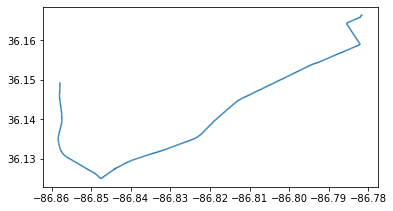

In [22]:
res125.plot()

In [24]:
res225

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.455533,9.881765,6.140,4.147,2.706,2.618,2.2230,2.027,1.523,1.461,1.830,15
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.711979,13.911386,5.045,2.074,1.869,1.727,1.5690,1.464,1.307,0.564,1.400,47
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,1.808313,13.742643,2.659,2.435,2.169,2.071,1.6840,1.539,1.391,1.317,1.513,16
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.073525,11.813217,5.306,3.506,2.357,2.193,1.8610,1.523,1.318,1.219,1.374,61
4,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.490146,9.757259,4.481,3.689,3.033,2.756,2.4265,2.001,1.746,1.347,1.889,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.140286,11.396608,4.335,2.794,2.480,2.256,2.0180,1.840,1.592,1.237,1.691,63
557,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.746500,8.722374,13.134,9.379,2.977,1.971,1.5435,1.315,1.182,1.111,1.286,16
558,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.661688,14.383567,2.631,2.505,2.146,1.688,1.4840,1.397,1.210,1.071,1.334,16
559,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,7.089508,3.389939,46.448,14.726,10.896,7.403,3.5600,2.672,2.230,1.922,2.477,63


<AxesSubplot:>

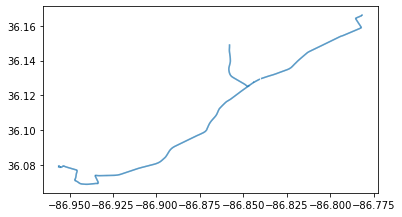

In [25]:
res325.plot()

<AxesSubplot:>

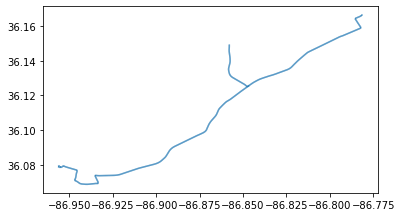

In [26]:
res425.plot()

## Tues/Wed/Thurs for 1/25-7/25

In [67]:
params_geo6 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params_geo7 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params_geo8 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params_geo9 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params_geo10 = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params_geo11 = {
    'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params6 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params7 = {
       'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params8 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params9 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params10 = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

params11 = {
    'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,2,3,4,5',
}

In [68]:
response_geo6 = requests.get(URL, params = params_geo6, headers = headers)
response_geo7 = requests.get(URL, params = params_geo7, headers = headers)
response_geo8 = requests.get(URL, params = params_geo8, headers = headers)
response_geo9 = requests.get(URL, params = params_geo9, headers = headers)
response_geo10 = requests.get(URL, params = params_geo10, headers = headers)
response_geo11 = requests.get(URL, params = params_geo11, headers = headers)
response6 = requests.get(URL, params = params6, headers = headers)
response7 = requests.get(URL, params = params7, headers = headers)
response8 = requests.get(URL, params = params8, headers = headers)
response9 = requests.get(URL, params = params9, headers = headers)
response10 = requests.get(URL, params = params10, headers = headers)
response11 = requests.get(URL, params = params11, headers = headers)

In [69]:
response_line_seg6 = response_geo6.json()['features']
response_line_seg7 = response_geo7.json()['features']
response_line_seg8 = response_geo8.json()['features']
response_line_seg9 = response_geo9.json()['features']
response_line_seg10 = response_geo10.json()['features']
response_line_seg11 = response_geo11.json()['features']
response_line_seg6j = response6.json()['data']['segments']
response_line_seg7j = response7.json()['data']['segments']
response_line_seg8j = response8.json()['data']['segments']
response_line_seg9j = response9.json()['data']['segments']
response_line_seg10j = response10.json()['data']['segments']
response_line_seg11j = response11.json()['data']['segments']
r3_125t = gpd.GeoDataFrame.from_features(response_line_seg6)
r3_225t = gpd.GeoDataFrame.from_features(response_line_seg7)
r3_325t = gpd.GeoDataFrame.from_features(response_line_seg8)
r3_425t = gpd.GeoDataFrame.from_features(response_line_seg9)
r3_525t = gpd.GeoDataFrame.from_features(response_line_seg10)
r3_625t = gpd.GeoDataFrame.from_features(response_line_seg11)
r3_125jt = pd.DataFrame.from_dict(response_line_seg6j)
r3_225jt = pd.DataFrame.from_dict(response_line_seg7j)
r3_325jt = pd.DataFrame.from_dict(response_line_seg8j)
r3_425jt = pd.DataFrame.from_dict(response_line_seg9j)
r3_525jt = pd.DataFrame.from_dict(response_line_seg10j)
r3_625jt = pd.DataFrame.from_dict(response_line_seg11j)

In [70]:
res125t =pd.concat([r3_125t, r3_125jt[['percent20Secs', 'countForSegment']]], axis = 1)
res225t =pd.concat([r3_225t, r3_225jt[['percent20Secs', 'countForSegment']]], axis = 1)
res325t =pd.concat([r3_325t, r3_325jt[['percent20Secs', 'countForSegment']]], axis = 1)
res425t =pd.concat([r3_425t, r3_425jt[['percent20Secs', 'countForSegment']]], axis = 1)
res525t =pd.concat([r3_525t, r3_525jt[['percent20Secs', 'countForSegment']]], axis = 1)
res625t =pd.concat([r3_625t, r3_625jt[['percent20Secs', 'countForSegment']]], axis = 1)

<AxesSubplot:>

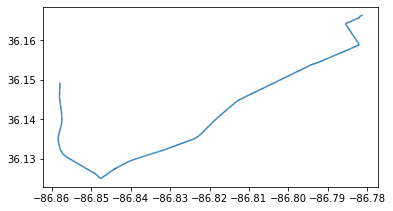

In [71]:
res125t.plot()

In [72]:
res225t

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,3.119897,7.777500,20.360,6.140,2.929,2.674,2.2760,2.012,1.806,1.461,1.930,39
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.667692,14.280814,5.045,2.107,1.804,1.707,1.5690,1.449,1.294,0.564,1.407,117
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,2.020750,12.297909,7.599,2.521,2.232,2.090,1.7725,1.650,1.476,1.317,1.555,40
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.210845,11.079474,8.269,3.416,2.689,2.290,1.9680,1.689,1.336,1.012,1.509,155
4,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.602194,9.337121,5.812,3.703,3.271,2.951,2.4190,2.087,1.748,1.347,1.904,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.398164,10.171114,35.715,2.747,2.445,2.266,2.0490,1.856,1.565,0.720,1.739,159
557,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.562250,9.349595,13.134,6.815,3.239,1.981,1.6330,1.466,1.280,1.111,1.362,40
558,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.686650,14.170693,2.631,2.261,2.062,1.850,1.5800,1.464,1.302,1.071,1.404,40
559,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,6.511709,3.690736,46.448,14.995,9.415,5.744,3.7095,2.756,2.234,1.847,2.472,158


<AxesSubplot:>

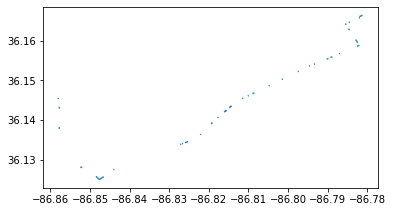

In [73]:
res225t[res225t['averageTravelSeconds'] > 6].plot()

<AxesSubplot:>

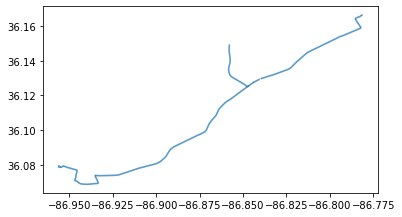

In [74]:
res325t.plot()

<AxesSubplot:>

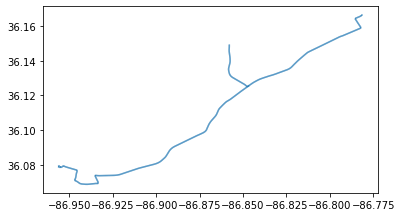

In [75]:
res425t.plot()

<AxesSubplot:>

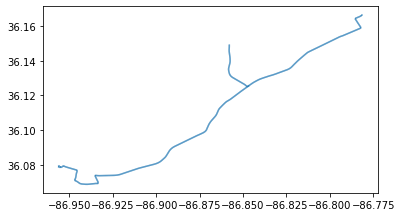

In [76]:
res525t.plot()

<AxesSubplot:>

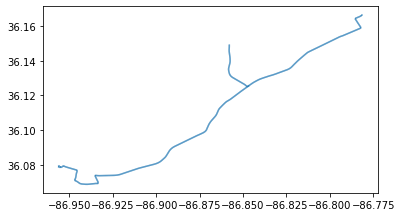

In [77]:
res625t.plot()

In [78]:
res425t

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.752751,13.866773,19.382,2.066,1.885,1.804,1.6100,1.454,1.309,1.077,1.381,169
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.651458,9.151569,18.689,4.260,3.209,2.723,2.2410,1.993,1.717,1.494,1.893,330
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.408994,17.235702,2.660,1.601,1.512,1.468,1.3895,1.318,1.231,0.767,1.277,168
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.533296,9.810539,10.602,4.248,3.398,2.822,2.0940,1.820,1.417,0.798,1.682,162
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.104380,3.031941,81.765,26.523,4.754,3.485,2.6335,1.782,1.490,0.471,1.630,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.689231,14.648085,23.502,1.608,1.429,1.345,1.2620,1.200,1.106,0.968,1.150,169
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.765318,13.570360,25.246,2.014,1.779,1.652,1.5280,1.404,1.269,0.997,1.349,327
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.683561,14.196694,6.216,2.247,1.902,1.749,1.5690,1.432,1.286,1.048,1.368,330
1050,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.738066,8.744493,5.194,3.819,3.390,3.073,2.5950,2.267,1.844,0.969,2.039,167


In [79]:
res625t

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.591403,15.272687,3.634,1.912,1.728,1.671,1.5585,1.438,1.306,0.777,1.390,144
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.601296,9.328043,17.390,3.979,3.229,2.741,2.2850,1.940,1.664,1.318,1.785,287
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.444859,16.807868,3.532,1.629,1.568,1.501,1.4215,1.337,1.227,1.144,1.284,142
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.180779,11.396386,5.366,3.895,2.755,2.178,1.7610,1.574,1.336,1.033,1.434,149
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.939185,3.541050,76.658,20.699,4.613,3.128,2.1245,1.673,1.448,0.734,1.551,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,2.822027,8.768166,140.224,1.524,1.415,1.335,1.2570,1.178,1.110,0.777,1.149,146
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.606331,14.913489,4.523,1.874,1.714,1.628,1.5050,1.393,1.270,0.965,1.339,287
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.597907,14.957692,3.695,2.054,1.772,1.633,1.4840,1.383,1.237,0.962,1.328,289
1050,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.719753,8.803373,10.490,4.255,3.467,3.085,2.4695,1.970,1.639,1.259,1.814,146


In [80]:
res125.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,24.290684,4.128005,9.572785,20.592318,8.099346,5.503342,4.415442,2.866658,2.278507,1.882790,1.605930,2.065599,59.997877
std,1.279032,10.261709,3.828279,36.588138,24.105119,20.562528,18.868968,7.032862,4.297316,3.521756,3.507265,3.700193,8.379940
min,0.000000,1.551571,0.000000,2.057000,1.791000,1.697000,1.603000,1.424000,1.303000,1.225000,0.941000,1.262000,1.000000
25%,24.033000,1.893794,6.898616,4.245000,2.435000,2.029500,1.892500,1.708000,1.562500,1.377000,1.214000,1.472000,62.000000
50%,24.572000,2.432968,10.086928,7.254000,3.339000,2.685000,2.369000,2.069000,1.830000,1.574000,1.303000,1.719000,63.000000
75%,24.853000,3.499971,12.779599,22.473000,5.889000,4.093500,3.309500,2.491500,2.115500,1.799000,1.497000,1.981500,63.000000
max,24.998000,197.282455,15.349604,465.976000,458.107000,417.590000,392.020000,128.521000,75.015000,75.015000,75.015000,75.015000,69.000000


In [81]:
res125t.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,24.289383,5.507941,9.307162,32.457748,10.840100,7.653483,6.319008,4.271930,2.595034,1.890144,1.481042,2.205089,171.762712
std,1.277986,22.324237,3.841382,66.745266,47.392182,38.866006,35.797597,21.375065,7.190388,3.462771,3.414644,4.765905,25.741877
min,0.000000,1.578376,0.000000,2.391000,1.808000,1.685000,1.636000,1.524000,1.386000,1.230000,0.898000,1.327000,2.000000
25%,24.033000,1.946344,6.555779,5.392750,2.473000,2.108250,1.914000,1.721000,1.584750,1.396250,1.148000,1.509750,176.000000
50%,24.533500,2.456583,9.947812,9.708500,3.527000,2.774500,2.410500,2.085500,1.826000,1.561000,1.228000,1.715000,179.000000
75%,24.853000,3.699959,12.426391,36.982750,6.156000,4.254000,3.416250,2.617750,2.168000,1.845250,1.388000,2.016750,182.250000
max,24.998000,359.509500,15.558443,736.271000,644.004000,644.004000,644.004000,359.509500,126.559000,75.015000,75.015000,75.015000,196.000000


In [112]:
res325 = res325[res325['countForSegment'] > 10]

In [113]:
res325t = res325t[res325t['countForSegment'] > 10]

In [96]:
res425 = res425[res425['countForSegment'] > 10]

In [97]:
res425t = res425t[res425t['countForSegment'] > 10]

In [100]:
res525 = res525[res525['countForSegment'] > 10]

In [101]:
res525t = res525t[res525t['countForSegment'] > 10]

In [102]:
res625 = res625[res625['countForSegment'] > 10]

In [103]:
res625t = res625t[res625t['countForSegment'] > 10]

In [104]:
res425.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,3.044035,11.626556,19.035147,5.602664,3.667389,2.926847,2.158289,1.784725,1.486502,1.145638,1.630524,90.254528
std,0.519061,4.878622,4.970247,36.164335,12.922015,8.751366,6.734736,3.304722,1.544437,0.482178,0.337860,0.688731,34.444793
min,22.108000,1.117566,0.180339,1.385000,1.248000,1.180000,1.159000,1.111000,1.062000,0.941000,0.471000,1.027000,26.000000
25%,24.078000,1.587643,8.076462,2.989000,1.936000,1.757000,1.643000,1.477000,1.348000,1.223000,0.941000,1.290000,69.000000
50%,24.470000,2.089478,11.647170,5.950000,2.805000,2.306000,2.028000,1.756000,1.596000,1.400000,1.122000,1.511000,71.000000
75%,24.723000,3.030197,15.239177,17.991000,4.931000,3.484000,2.838000,2.239500,1.905000,1.609000,1.276000,1.758000,138.000000
max,24.998000,131.291769,21.332836,501.076000,319.419000,244.239000,193.323000,101.967500,46.447000,9.049000,4.415000,14.563000,144.000000


In [105]:
res425t.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,3.083234,11.423291,27.248296,5.514704,3.723292,2.930460,2.171260,1.790347,1.496650,1.024635,1.642806,211.889418
std,0.519061,4.756552,4.920623,78.017171,12.208792,8.319898,6.376332,3.515504,1.489139,0.469919,0.356719,0.695126,79.947151
min,22.108000,1.146683,0.185006,1.632000,1.289000,1.235000,1.181000,1.123000,1.069000,0.884000,0.333000,1.046000,52.000000
25%,24.078000,1.616750,7.665425,3.927000,1.961000,1.781000,1.650000,1.486000,1.367000,1.235000,0.798000,1.306000,162.000000
50%,24.470000,2.128503,11.471644,8.201000,2.837000,2.335000,2.108000,1.777000,1.614000,1.405000,1.022000,1.526000,169.000000
75%,24.723000,3.149844,15.050913,29.903000,5.110000,3.631000,2.940000,2.267500,1.901000,1.621000,1.208000,1.769000,325.000000
max,24.998000,127.979654,21.339812,2126.105000,303.840000,225.786000,182.842000,109.961000,45.014000,8.674000,4.031000,15.672000,336.000000


In [114]:
res325.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,3.147682,11.509207,18.640029,5.884002,3.889775,3.008959,2.208913,1.836538,1.502971,1.185099,1.669592,68.928503
std,0.519061,6.412001,4.908829,37.170857,15.661026,10.959350,8.285153,4.904605,2.744363,0.548485,0.398536,1.278527,31.244689
min,22.108000,1.105179,0.127322,1.417000,1.300000,1.225000,1.181000,1.095000,1.024000,0.778000,0.530000,0.984000,13.000000
25%,24.078000,1.613939,8.062480,2.785000,1.986000,1.764000,1.674000,1.473500,1.346000,1.228000,0.990000,1.299000,46.000000
50%,24.470000,2.118912,11.494754,5.515000,2.808000,2.360000,2.115000,1.803500,1.628000,1.442000,1.187000,1.543000,48.000000
75%,24.723000,3.028021,14.943016,15.669000,4.946000,3.534000,2.834000,2.274000,1.926000,1.668000,1.354000,1.806000,113.000000
max,24.998000,185.961769,21.582099,426.348000,416.005000,313.928000,250.670000,156.170000,87.657000,13.506000,7.834000,39.665000,118.000000


In [115]:
res325t.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,3.151531,11.179719,25.282581,5.707329,3.790973,2.971452,2.134545,1.793747,1.521840,1.063103,1.666017,165.777884
std,0.519061,4.503648,4.794707,48.532886,12.648282,8.492481,6.099261,1.801593,0.767361,0.425693,0.345020,0.556295,77.087905
min,22.108000,1.140237,0.211344,1.567000,1.388000,1.270000,1.204000,1.128000,1.079000,0.812000,0.452000,0.999000,33.000000
25%,24.078000,1.661370,7.598009,3.582000,2.005000,1.814000,1.687000,1.516000,1.395000,1.241000,0.756000,1.333000,110.000000
50%,24.470000,2.145938,11.278525,7.615000,2.854000,2.358000,2.139000,1.820000,1.655000,1.449000,1.036000,1.572000,114.000000
75%,24.723000,3.209496,14.606967,28.421000,4.981000,3.669000,2.977000,2.308000,1.945000,1.672000,1.255000,1.814000,273.000000
max,24.998000,112.030455,20.834735,665.011000,308.019000,229.019000,169.206000,44.077000,13.863000,5.318000,2.900000,8.380000,287.000000


In [108]:
res425.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,3.044035,11.626556,19.035147,5.602664,3.667389,2.926847,2.158289,1.784725,1.486502,1.145638,1.630524,90.254528
std,0.519061,4.878622,4.970247,36.164335,12.922015,8.751366,6.734736,3.304722,1.544437,0.482178,0.337860,0.688731,34.444793
min,22.108000,1.117566,0.180339,1.385000,1.248000,1.180000,1.159000,1.111000,1.062000,0.941000,0.471000,1.027000,26.000000
25%,24.078000,1.587643,8.076462,2.989000,1.936000,1.757000,1.643000,1.477000,1.348000,1.223000,0.941000,1.290000,69.000000
50%,24.470000,2.089478,11.647170,5.950000,2.805000,2.306000,2.028000,1.756000,1.596000,1.400000,1.122000,1.511000,71.000000
75%,24.723000,3.030197,15.239177,17.991000,4.931000,3.484000,2.838000,2.239500,1.905000,1.609000,1.276000,1.758000,138.000000
max,24.998000,131.291769,21.332836,501.076000,319.419000,244.239000,193.323000,101.967500,46.447000,9.049000,4.415000,14.563000,144.000000


In [109]:
res425t.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,3.083234,11.423291,27.248296,5.514704,3.723292,2.930460,2.171260,1.790347,1.496650,1.024635,1.642806,211.889418
std,0.519061,4.756552,4.920623,78.017171,12.208792,8.319898,6.376332,3.515504,1.489139,0.469919,0.356719,0.695126,79.947151
min,22.108000,1.146683,0.185006,1.632000,1.289000,1.235000,1.181000,1.123000,1.069000,0.884000,0.333000,1.046000,52.000000
25%,24.078000,1.616750,7.665425,3.927000,1.961000,1.781000,1.650000,1.486000,1.367000,1.235000,0.798000,1.306000,162.000000
50%,24.470000,2.128503,11.471644,8.201000,2.837000,2.335000,2.108000,1.777000,1.614000,1.405000,1.022000,1.526000,169.000000
75%,24.723000,3.149844,15.050913,29.903000,5.110000,3.631000,2.940000,2.267500,1.901000,1.621000,1.208000,1.769000,325.000000
max,24.998000,127.979654,21.339812,2126.105000,303.840000,225.786000,182.842000,109.961000,45.014000,8.674000,4.031000,15.672000,336.000000


In [110]:
res525.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,2.971970,11.926415,17.168584,5.354981,3.638882,2.918686,2.224502,1.846160,1.475173,1.124541,1.658114,86.206864
std,0.519061,6.287628,4.839490,38.769522,15.137147,9.907514,8.014495,5.834163,3.269777,0.569241,0.389405,1.321998,33.524631
min,22.108000,1.182947,0.127603,1.707000,1.366000,1.256000,1.208000,1.146500,1.080000,0.750000,0.380000,0.974000,24.000000
25%,24.078000,1.558904,8.345214,2.809000,1.930000,1.729000,1.616000,1.485000,1.371000,1.177000,0.883000,1.300000,65.000000
50%,24.470000,2.019731,12.126927,5.402000,2.645000,2.207000,2.001000,1.775000,1.599000,1.390000,1.093000,1.497000,67.000000
75%,24.723000,2.883882,15.577773,14.549000,4.393000,3.334000,2.776000,2.265500,1.933000,1.650000,1.302000,1.801000,132.000000
max,24.998000,185.552750,20.625039,470.138000,419.202000,288.329000,241.748000,186.787500,105.038000,13.246000,6.638000,40.398000,138.000000


In [111]:
res525t.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,2.984113,11.809792,23.459311,5.327337,3.698321,2.942803,2.184112,1.785243,1.478756,1.017071,1.644378,225.310772
std,0.519061,5.700170,4.844028,46.085181,13.799042,10.586969,8.229433,4.553941,1.544024,0.507470,0.330294,0.990377,86.886962
min,22.108000,1.159480,0.143284,1.720000,1.336000,1.236000,1.202000,1.137000,1.074000,0.801000,0.380000,1.038000,65.000000
25%,24.078000,1.575336,8.339818,3.764000,1.925000,1.742000,1.622000,1.486000,1.374000,1.211000,0.826000,1.298000,172.000000
50%,24.470000,2.051173,11.852073,7.028000,2.692000,2.262000,2.015000,1.783500,1.602000,1.400000,0.948000,1.498000,178.000000
75%,24.723000,2.926688,15.416514,22.293000,4.445000,3.388000,2.839000,2.273000,1.938000,1.639000,1.205000,1.806000,345.000000
max,24.998000,165.245388,21.104288,484.671000,373.796000,312.269000,249.790000,144.604000,46.575000,10.474000,4.389000,28.432000,363.000000
